In [46]:
from pathlib import Path
import pandas as pd
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from dotenv import load_dotenv
%matplotlib inline

In [47]:
### create path to csv's and read csvs.
###path_name= ('../Resources/name.csv') ###
aapl_path = Path('Data/AAPL_daily_price.csv')
amazon_path = Path('Data/AMZN_daily_price.csv')
dowj_path = Path('Data/DOWJ_daily_price.csv')
fb_path = Path('Data/FB_daily_price.csv')
msft_path = Path('Data/MSFT_daily_price.csv')
nasdaq_path = Path('Data/NASDAQ_daily_price.csv')
nflx_path = Path('Data/NFLX_daily_price.csv')
sp500_path = Path('Data/SP500_daily_price.csv')
tsla_path = Path('Data/TSLA_daily_price.csv')
vix_path = Path('Data/VIX_daily_price.csv')
wmt_path = Path('Data/WMT_daily_price.csv')

In [48]:
### read in the data and set index to date time and create df. ###
### variable = pd.read_csv(path, index_col = "column name")
AAPL_csv = pd.read_csv(aapl_path, index_col= 'Date',infer_datetime_format = True, parse_dates = True)
AMAZ_csv = pd.read_csv(amazon_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
DOWJ_csv = pd.read_csv(dowj_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
FB_csv = pd.read_csv(fb_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
MSFT_csv = pd.read_csv(msft_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NASDAQ_csv = pd.read_csv(nasdaq_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NFLX_csv = pd.read_csv(nflx_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
SP500_csv = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
TSLA_csv = pd.read_csv(tsla_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
VIX_csv = pd.read_csv(vix_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
WMT_csv = pd.read_csv(wmt_path, index_col='Date',infer_datetime_format = True, parse_dates = True)

#rename columns
AAPL_csv = AAPL_csv.rename(columns={'Close':'AAPL'})
AMAZ_csv = AMAZ_csv.rename(columns={'Close':'AMZN'})
DOWJ_csv = DOWJ_csv.rename(columns={'Close':'DOWJ'})
FB_csv = FB_csv.rename(columns={'Close':'FB'})
MSFT_csv = MSFT_csv.rename(columns={'Close':'MSFT'})
NASDAQ_csv = NASDAQ_csv.rename(columns={'Close':'NASDAQ'})
NFLX_csv = NFLX_csv.rename(columns={'Close':'NFLX'})
SP500_csv = SP500_csv.rename(columns={'Close':'S&P500'})
TSLA_csv = TSLA_csv.rename(columns={'Close':'TSLA'})
VIX_csv = VIX_csv.rename(columns={'Close':'VIX'})
WMT_csv = WMT_csv.rename(columns={'Close':'WMT'})

NASDAQ_csv.index = pd.to_datetime(NASDAQ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
VIX_csv.index = pd.to_datetime(VIX_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
SP500_csv.index = pd.to_datetime(SP500_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
DOWJ_csv.index = pd.to_datetime(DOWJ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')






In [49]:
#join stocks into one dataframe and indexes into another
stocks = pd.concat([AAPL_csv,AMAZ_csv,FB_csv,MSFT_csv,NFLX_csv,TSLA_csv,WMT_csv], join='inner', axis='columns')
stocks = stocks.drop(columns='Symbol')

stocks.index = pd.to_datetime(stocks.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
stocks.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
2015-01-02,27.33,308.52,78.45,46.76,49.85,43.86,85.90
2015-01-05,26.56,302.19,77.19,46.33,47.31,42.02,85.65
2015-01-06,26.57,295.29,76.15,45.65,46.50,42.26,86.31
2015-01-07,26.94,298.42,76.15,46.23,46.74,42.19,88.60
2015-01-08,27.97,300.46,78.18,47.59,47.78,42.12,90.47


In [50]:
indexes = pd.concat([NASDAQ_csv,DOWJ_csv,SP500_csv,VIX_csv],join='inner',axis='columns')
indexes = indexes.drop(columns='Symbol')
indexes.head()

,NASDAQ,DOWJ,S&P500,VIX
2015-01-02,4726.81,17832.99,2058.20,17.79
2015-01-05,4652.57,17501.65,2020.58,19.92
2015-01-06,4592.74,17371.64,2002.61,21.12
2015-01-07,4650.47,17584.52,2025.90,19.31
2015-01-08,4736.19,17907.87,2062.14,17.01


In [51]:
###calculate daily percent change for each culumn from all data sources ###



daily_change_indexes = indexes.pct_change()

##remove all null values#

daily_change_indexes = daily_change_indexes.dropna()
daily_change_indexes.head()

,NASDAQ,DOWJ,S&P500,VIX
2015-01-05,-0.015706,-0.018580,-0.018278,0.119730
2015-01-06,-0.012860,-0.007428,-0.008893,0.060241
2015-01-07,0.012570,0.012254,0.011630,-0.085701
2015-01-08,0.018433,0.018388,0.017888,-0.119109
2015-01-09,-0.006782,-0.009521,-0.008404,0.031746


In [52]:
daily_change_stocks = stocks.pct_change()
daily_change_stocks = daily_change_stocks.dropna()
daily_change_stocks.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
2015-01-05,-0.028174,-0.020517,-0.016061,-0.009196,-0.050953,-0.041952,-0.002910
2015-01-06,0.000377,-0.022833,-0.013473,-0.014677,-0.017121,0.005712,0.007706
2015-01-07,0.013925,0.010600,0.000000,0.012705,0.005161,-0.001656,0.026532
2015-01-08,0.038233,0.006836,0.026658,0.029418,0.022251,-0.001659,0.021106
2015-01-09,0.001073,-0.011749,-0.005628,-0.008405,-0.015488,-0.018756,-0.012380


In [53]:
daily_change_indexes.hvplot.line(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [54]:
daily_change_stocks.hvplot.line(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

/Users/Jerry/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

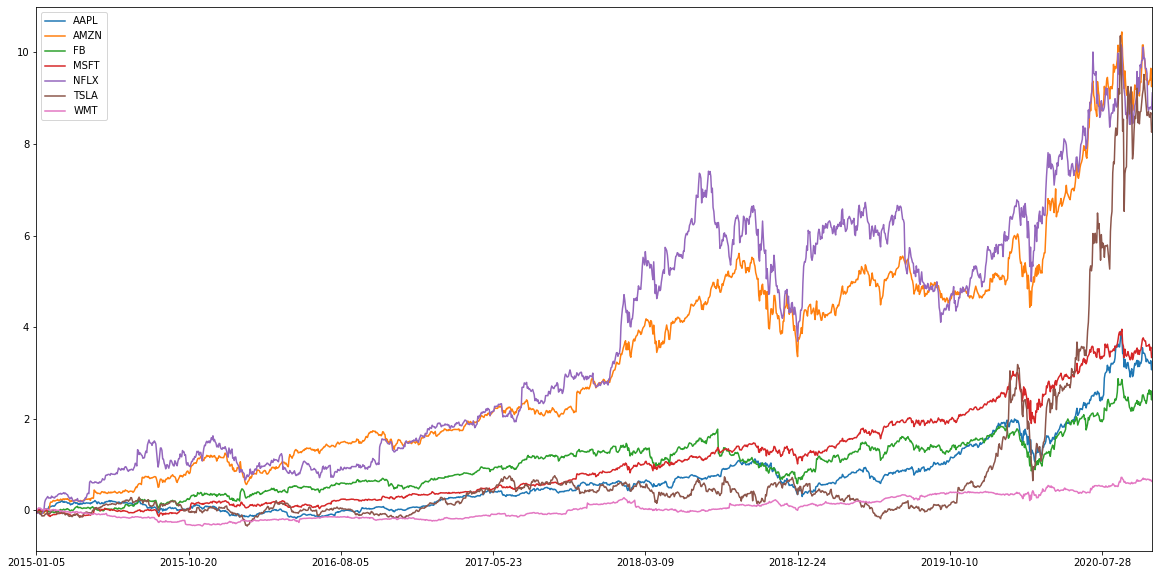

In [69]:
#cumulative returns
stocks_cumulative_returns = (1+ daily_change_stocks).cumprod()-1
stocks_cumulative_returns.plot(figsize=[20,10])

/Users/Jerry/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/plotting/_core.py:396: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:>

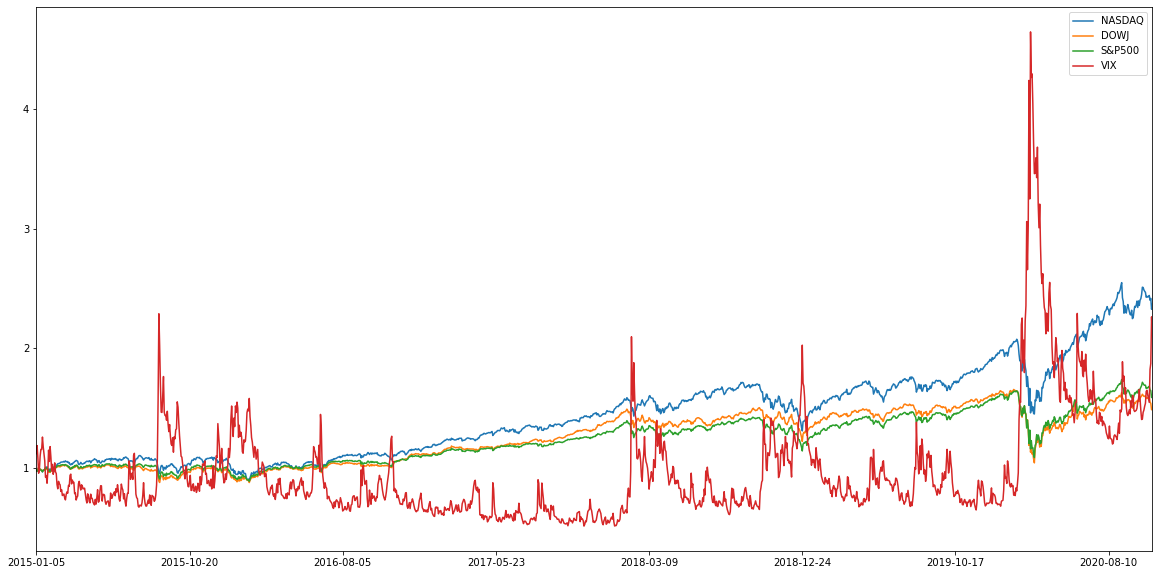

In [74]:
indexes_cumulative_returns = (1+ daily_change_indexes).cumprod()
indexes_cumulative_returns.plot(figsize=[20,10])

In [75]:
###for risk analysis  calculate the following ratios###
### calculate standard deviation for combined dataframe###
      ### dataframe.rolling(window = 7, 30, 90, 180 etc..).mean().plot()

indexes_std = daily_change_indexes.std()
stocks_std = daily_change_stocks.std()
stocks_std

AAPL    0.018652
AMZN    0.019507
FB      0.019989
MSFT    0.017621
NFLX    0.026845
TSLA    0.034550
WMT     0.013999
dtype: float64

In [57]:
### calculate beta ###
### # Create a new pivot table where the columns are the closing prices for each ticker
###combined_df = pd.concat([amzn_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
###combined_df.sort_index(inplace=True)

# Set column names to 'AMZN' and 'S&P 500'
###combined_df.columns = ["AMZN", "S&P 500"]

###Calculate Daily returns ###
###daily_returns = combined_df.pct_change()

# Calculate covariance of all daily returns of AMZN vs. S&P 500
###covariance = daily_returns['AMZN'].cov(daily_returns['S&P 500'])
###covariance

# Calculate variance of all daily returns of AMZN vs. S&P 500
###variance = daily_returns['S&P 500'].var()
###variance

# Calculate beta of all daily returns of AMZN
###amzn_beta = covariance / variance
###amzn_beta

# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
###rolling_covariance = daily_returns['AMZN'].rolling(window=30).cov(daily_returns['S&P 500'])
###rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')

# Calculate 30-day rolling variance of AMZN vs. S&P 500 and plot the data
###rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()
###rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

# Calculate 30-day rolling beta of AMZN and plot the data
###rolling_beta = rolling_covariance / rolling_variance
###rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of AMZN')

# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
###import seaborn as sns
###sns.lmplot(x='S&P 500', y='AMZN', data=daily_returns, aspect=1.5, fit_reg=True)

In [58]:
### calculate the sharpe ratios by computing the quotient of annualized average return and annualized statard deviaiton#

